In [1]:
import json

reviews = []
with open("Electronics.jsonl", 'r') as fp:
    for line in fp:
        reviews.append(json.loads(line.strip()))
        if len(reviews) >= 20000:
            break

In [2]:
reviews[0]

{'rating': 3.0,
 'title': 'Smells like gasoline! Going back!',
 'text': 'First & most offensive: they reek of gasoline so if you are sensitive/allergic to petroleum products like I am you will want to pass on these.  Second: the phone adapter is useless as-is. Mine was not drilled far enough to be able to tighten it into place for my iPhone 12 max. It just slipped & slid all over. Stupid me putting the adapter together first without picking up the binoculars to smell them bc I wasted 15 minutes trying to figure out how to put the adapter together bc it does not come with instructions!  I had to come back here to the website which was a total pain. Third: the tripod is also useless. I would not trust the iOS to hold my $1600 phone nor even a Mattel Barbie for that matter. It’s just inefficient for the job imo.  Third: in order to try to give an honest review I did don gloves & eyewear to check the binoculars out.  They seemed average except for mine seemed to be missing about 10% of the

In [3]:
import json

metadata = []
with open("meta_Electronics.jsonl", 'r') as fp:
    for line in fp:
        metadata.append(json.loads(line.strip()))
        if len(metadata) >= 20000:
            break

In [4]:
metadata[0]

{'main_category': 'All Electronics',
 'title': 'FS-1051 FATSHARK TELEPORTER V3 HEADSET',
 'average_rating': 3.5,
 'rating_number': 6,
 'features': [],
 'description': ['Teleporter V3 The “Teleporter V3” kit sets a new level of value in the FPV world with Fat Shark renowned performance and quality. The fun of FPV is experienced firsthand through the large screen FPV headset with integrated NexwaveRF receiver technology while simultaneously recording onboard HD footage with the included “PilotHD” camera. The “Teleporter V3” kit comes complete with everything you need to step into the cockpit of your FPV vehicle. We’ve included our powerful 250mW 5.8Ghz transmitter, 25 degree FOV headset (largest QVGA display available), the brand new “PilotHD” camera with live AV out and all the cables, antennas and connectors needed.'],
 'price': None,
 'images': [{'thumb': 'https://m.media-amazon.com/images/I/41qrX56lsYL._AC_US40_.jpg',
   'large': 'https://m.media-amazon.com/images/I/41qrX56lsYL._AC_.

1. Dataset Structure

In [5]:
print("Review keys:", reviews[0].keys())

Review keys: dict_keys(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase'])


In [6]:
print("Metadata keys:", metadata[0].keys())

Metadata keys: dict_keys(['main_category', 'title', 'average_rating', 'rating_number', 'features', 'description', 'price', 'images', 'videos', 'store', 'categories', 'details', 'parent_asin', 'bought_together'])


2. Basic Statistics

In [7]:
print(f"Total number of reviews: {len(reviews)}")

Total number of reviews: 20000


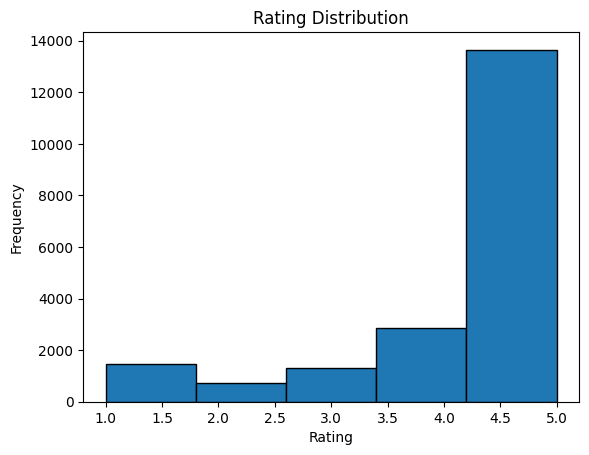

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

ratings = [review['rating'] for review in reviews if 'rating' in review]
plt.hist(ratings, bins=5, edgecolor='black')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

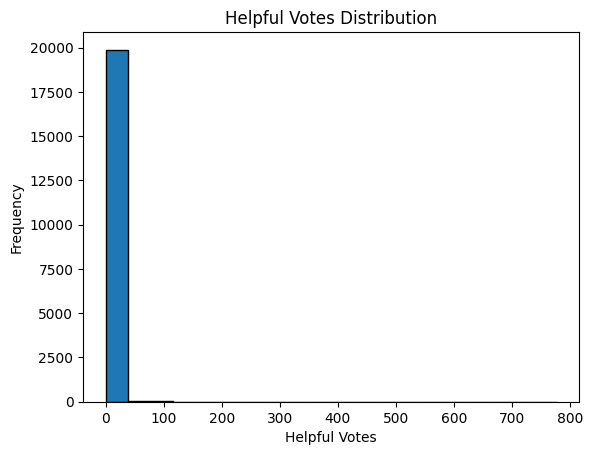

In [9]:
helpful_votes = [review['helpful_vote'] for review in reviews]
plt.hist(helpful_votes, bins=20, edgecolor='black')
plt.title("Helpful Votes Distribution")
plt.xlabel("Helpful Votes")
plt.ylabel("Frequency")
plt.show()

In [10]:
verified_count = sum([1 for review in reviews if review.get('verified_purchase')])
print(f"Number of verified purchases: {verified_count}")

Number of verified purchases: 14405


Average review length: 417.25 characters


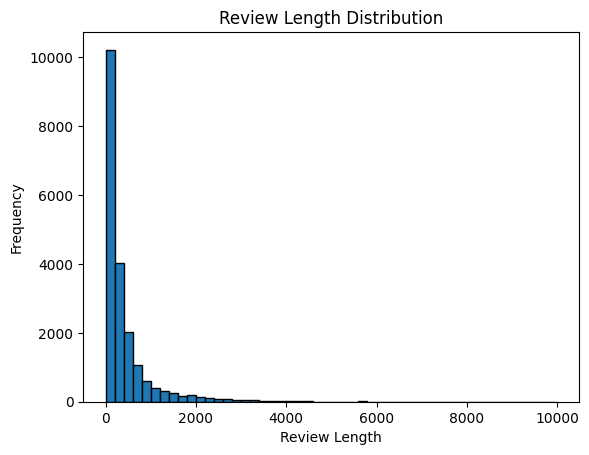

In [11]:
review_lengths = [len(review.get('text', '')) for review in reviews]
print(f"Average review length: {sum(review_lengths) / len(review_lengths):.2f} characters")
plt.hist(review_lengths, bins=50, edgecolor='black')
plt.title("Review Length Distribution")
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.show()

In [12]:
print(f"Total number of items in metadata: {len(metadata)}")

Total number of items in metadata: 20000


In [13]:
avg_ratings = [meta['average_rating'] for meta in metadata if meta.get('average_rating') is not None]
print(f"Average item rating: {sum(avg_ratings) / len(avg_ratings):.2f}")

Average item rating: 4.08


Computers                    5923
All Electronics              4874
Camera & Photo               2583
Cell Phones & Accessories    1978
Home Audio & Theater         1238
Name: count, dtype: int64


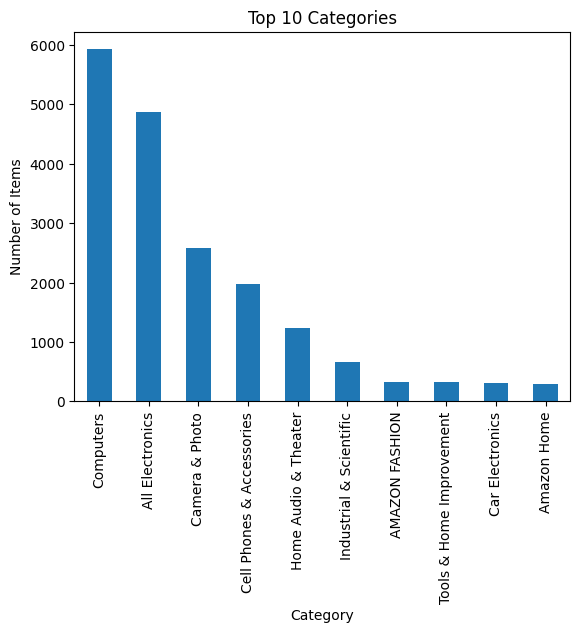

In [14]:
import pandas as pd

categories = [meta['main_category'] for meta in metadata if 'main_category' in meta]
category_counts = pd.Series(categories).value_counts()
print(category_counts.head())
category_counts.head(10).plot(kind='bar')
plt.title("Top 10 Categories")
plt.xlabel("Category")
plt.ylabel("Number of Items")
plt.show()

In [15]:
from datetime import datetime

dates = [
    datetime.strptime(meta['details']['Date First Available'], '%B %d, %Y')
    for meta in metadata
    if meta['details'].get('Date First Available')
]
print(f"Earliest product availability date: {min(dates)}")
print(f"Latest product availability date: {max(dates)}")

Earliest product availability date: 1973-09-04 00:00:00
Latest product availability date: 2023-05-26 00:00:00


3. Explore Relationships

In [16]:
ratings_by_category = {}
for review in reviews:
    asin = review['asin']
    category = next((meta['main_category'] for meta in metadata if meta['parent_asin'] == asin), None)
    if category:
        ratings_by_category.setdefault(category, []).append(review['rating'])

# Example: Average ratings by category
avg_ratings_category = {cat: sum(ratings) / len(ratings) for cat, ratings in ratings_by_category.items()}
print(sorted(avg_ratings_category.items(), key=lambda x: x[1], reverse=True))

[('GPS & Navigation', 5.0), ('Industrial & Scientific', 5.0), ('AMAZON FASHION', 5.0), ('Home Audio & Theater', 4.833333333333333), ('Tools & Home Improvement', 4.666666666666667), ('Amazon Devices', 4.5), ('Computers', 4.473684210526316), ('All Electronics', 4.371428571428571), ('Cell Phones & Accessories', 4.166666666666667), ('Camera & Photo', 4.166666666666667), ('Amazon Home', 3.75), ('Office Products', 3.0), ('Sports & Outdoors', 1.0), ('Health & Personal Care', 1.0)]


[('the', 64710), ('to', 41797), ('I', 41106), ('and', 41022), ('a', 39464), ('is', 27164), ('it', 24704), ('for', 20371), ('of', 19655), ('this', 16496)]


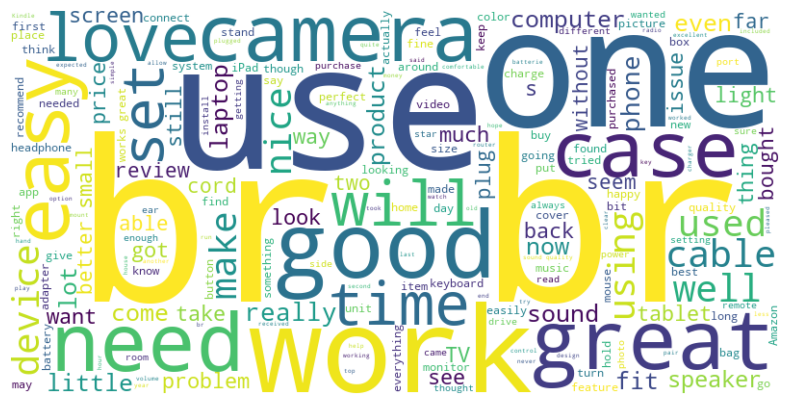

In [17]:
from collections import Counter
from wordcloud import WordCloud

all_text = ' '.join([review.get('text', '') for review in reviews])
word_counts = Counter(all_text.split())
print(word_counts.most_common(10))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
#electronics_reviews = [review for review in reviews if review['asin'] in [
   # meta['parent_asin'] for meta in metadata if meta['main_category'] == 'Electronics'
#]]
#print(f"Number of Electronics reviews: {len(electronics_reviews)}")

In [19]:
#electronics_metadata = [meta for meta in metadata if meta.get('main_category') == 'Electronics']
#print(f"Number of products in the Electronics category: {len(electronics_metadata)}")

# Optionally, display some of these entries to verify
#if electronics_metadata:
    #print(electronics_metadata[:5])
#else:
    #print("No products found in the Electronics category.")

In [20]:
# Check for "Electronics" in metadata
electronics_metadata = [meta for meta in metadata if meta.get('main_category') == 'Electronics']
print(f"Number of Electronics products in metadata: {len(electronics_metadata)}")

# Display a few entries to verify structure
if electronics_metadata:
    print(electronics_metadata[:5])

Number of Electronics products in metadata: 0
